In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import sklearn
import pandas as pd
import tensorflow as tf

import os
import sys
import time

from tensorflow import keras
from tensorflow.keras.models import Sequential
from numpy import array

for module in [matplotlib, np, sklearn, pd, tf]:
    print(module.__name__, module.__version__)

matplotlib 3.2.0
numpy 1.18.1
sklearn 0.22.2.post1
pandas 0.24.1
tensorflow 2.0.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

# 数据集中共有6w个样本 用前5000个样本作为验证集, 后5.5w个样本作为训练集
x_valid, x_train = x_train_all[: 5000], x_train_all[5000: ]
y_valid, y_train = y_train_all[: 5000], y_train_all[5000: ]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


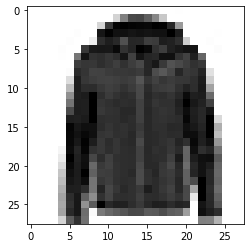

In [3]:
def show_single_image(img: array):
    # cmap为binary显示黑白图片
    plt.imshow(img, cmap="binary")
    plt.show()
    
show_single_image(x_train[0])

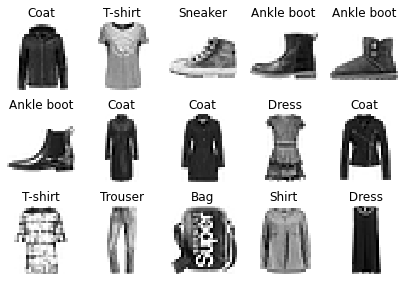

In [4]:
# 展示训练集中的图像
def show_imgs(n_rows: int, n_cols: int, x_data: array, y_data: array, class_name: list):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap="binary", interpolation="nearest")
            plt.axis("off")
            plt.title(class_name[y_data[index]])
    plt.show()
    
class_names = ["T-shirt", "Trouser", "Pullover", " Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

show_imgs(3, 5, x_train, y_train, class_names)

In [5]:
model: Sequential = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

#or
# model: Sequential = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

# relu: y = max(0, x)
# softmax: 将向量变成概率分布 x = [x1, x2, x3]
#       y = [[e^x1/sum, e^x2/sum, e^x3/sum], sum=e^x1+e^x2+e^x3]

# reason for sparse: y->index, y->onehot->[]
model.compile(
    loss="sparse_categorical_crossentropy", 
    optimizer="adam",
    metrics=["accuracy"]
)



In [6]:
model.summary()
# [None, 784] * W + b -> [None, 300]  W.shape [784, 300], b=[300]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 103us/sample - loss: 2.3551 - accuracy: 0.7164 - val_loss: 0.6724 - val_accuracy: 0.7924
Epoch 2/10
55000/55000 [==============================] - 5s 96us/sample - loss: 0.5906 - accuracy: 0.7957 - val_loss: 0.5895 - val_accuracy: 0.8052
Epoch 3/10
55000/55000 [==============================] - 5s 96us/sample - loss: 0.5130 - accuracy: 0.8221 - val_loss: 0.5169 - val_accuracy: 0.8300
Epoch 4/10
55000/55000 [==============================] - 5s 99us/sample - loss: 0.4693 - accuracy: 0.8362 - val_loss: 0.4790 - val_accuracy: 0.8422
Epoch 5/10
55000/55000 [==============================] - 5s 94us/sample - loss: 0.4369 - accuracy: 0.8480 - val_loss: 0.4147 - val_accuracy: 0.8550
Epoch 6/10
55000/55000 [==============================] - 6s 113us/sample - loss: 0.4061 - accuracy: 0.8563 - val_loss: 0.4085 - val_accuracy: 0.8580
Epoch 7/10
55000/55000 [==============================]

In [8]:
history.history

{'loss': [2.3550984018325805,
  0.5905894096157768,
  0.5130321820649234,
  0.46933854915228757,
  0.4369060110980814,
  0.406072459155863,
  0.3943629761912606,
  0.3824420930493962,
  0.36401102765473453,
  0.3581557224338705],
 'accuracy': [0.7164182,
  0.79572725,
  0.8221273,
  0.83623636,
  0.84796363,
  0.85627276,
  0.8607636,
  0.8644,
  0.87085456,
  0.8725273],
 'val_loss': [0.6723768027305603,
  0.5895367126464843,
  0.5169225711822509,
  0.4789871011376381,
  0.4147388681352139,
  0.4084757652521133,
  0.420775235915184,
  0.4243884453654289,
  0.4078931549668312,
  0.3966543644785881],
 'val_accuracy': [0.7924,
  0.8052,
  0.83,
  0.8422,
  0.855,
  0.858,
  0.857,
  0.8632,
  0.8628,
  0.872]}

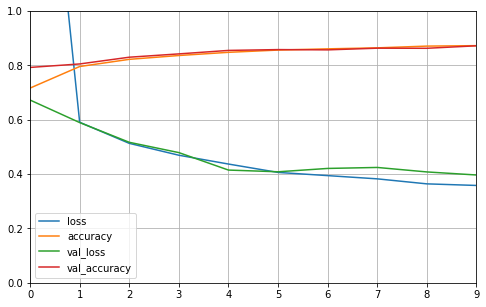

In [9]:
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curve(history)